In [1]:
#importing necessary libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re

import pickle
from tqdm import tqdm
import os



In [2]:
#loading dataset
data=pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")


In [3]:
#what is the shape of the dta set?
data.shape

(23486, 11)

In [4]:

#which columns are there?
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
#lets see the first 5 rows of each column.

data.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


!].We found some NaN values. So we will drop that in the next step.

In [6]:
#dropping nan values
data=data.dropna()
data.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


We have unnamed: 0 column which is unnecessary.

In [7]:
#dropping unnamed column
data=data.drop(["Unnamed: 0"],axis=1).reset_index()
data.head(2)

,index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


In [8]:
#Do you want to see more information about data set?...............

In [9]:
#here it is........
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.7+ MB


We don't have any null values... great!!!!

In [10]:
#Lets describe some statistical data.......

In [11]:
data.describe()

,index,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,11755.260655,921.297274,43.260808,4.183145,0.818177,2.652477
std,6772.063092,200.227528,12.258122,1.112224,0.385708,5.834285
min,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000
25%,5888.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11749.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17624.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [12]:
#lets check how many different values are there for clothing id
data["Clothing ID"].value_counts()

1078    871
862     658
1094    651
1081    487
829     452
       ... 
776       1
744       1
728       1
712       1
16        1
Name: Clothing ID, Length: 1095, dtype: int64

In [13]:
#lets get the value counts of division name
data["Division Name"].value_counts()

General           11664
General Petite     6778
Initmates          1220
Name: Division Name, dtype: int64

We have only 3 Divisions.. 

In [14]:
#lets check the value counts of department name
data["Department Name"].value_counts()

Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: Department Name, dtype: int64

In [15]:
#lets check the value counts of class name
data["Class Name"].value_counts()

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

***Okayy.. Now lets check our class label i.e. Recommended IND, also % of recommendations........***

In [16]:
a=data["Recommended IND"].value_counts()
print(a)
print("The products that are recommended are : ", (a[1]/(a[0]+a[1]))*100,"%")
print("the productys that are not recommended are :", (a[0]/(a[0]+a[1]))*100,"%")

1    16087
0     3575
Name: Recommended IND, dtype: int64
The products that are recommended are :  81.81771945885464 %
the productys that are not recommended are : 18.182280541145357 %


***The dataset is imbalanced. 1 means recommended. 0 means not recommended.***<br>
1]. We have ***81.8%*** of ***recommended*** data points.... and only ***18.18%*** of ***not recommended*** data points...
    

# Let,s analyse.. (UNIVARIATE ANALYSIS)

In [17]:
#lets define function for stack plot..........

In [18]:
def stack_plot(data,xtick,col2="Recommended IND",col3="total"):
    ind=np.arange(data.shape[0])
    
    plt.figure(figsize=(25,10))
    
    p1=plt.bar(ind,data[col3].values)
    p2=plt.bar(ind,data[col2].values)
    
    plt.ylabel("Recommendation")
    plt.xticks(ind,list(data[xtick].values))
    plt.legend((p1[0],p2[0]),("total","recommended"))
    plt.show()
    
    

In [19]:
def univariate(data,col1,col2="Recommended IND",top=False):
    temp=pd.DataFrame(data.groupby(col1)[col2].agg(lambda x:x.eq(1).sum())).reset_index()
    
    recommend=temp[col2]
    temp=pd.DataFrame(data.groupby(col1)[col2].agg([("Avg","mean"),("total","count")]).reset_index())
    temp[col2]=recommend
    
    temp.sort_values(by=["total"],inplace=True,ascending=False)
    
    if top:
        temp=temp[0:top]
        
    stack_plot(temp,xtick=col1,col2=col2,col3="total")
    print(temp.head(5))
    print("*"*50)
    print(temp.tail(5))

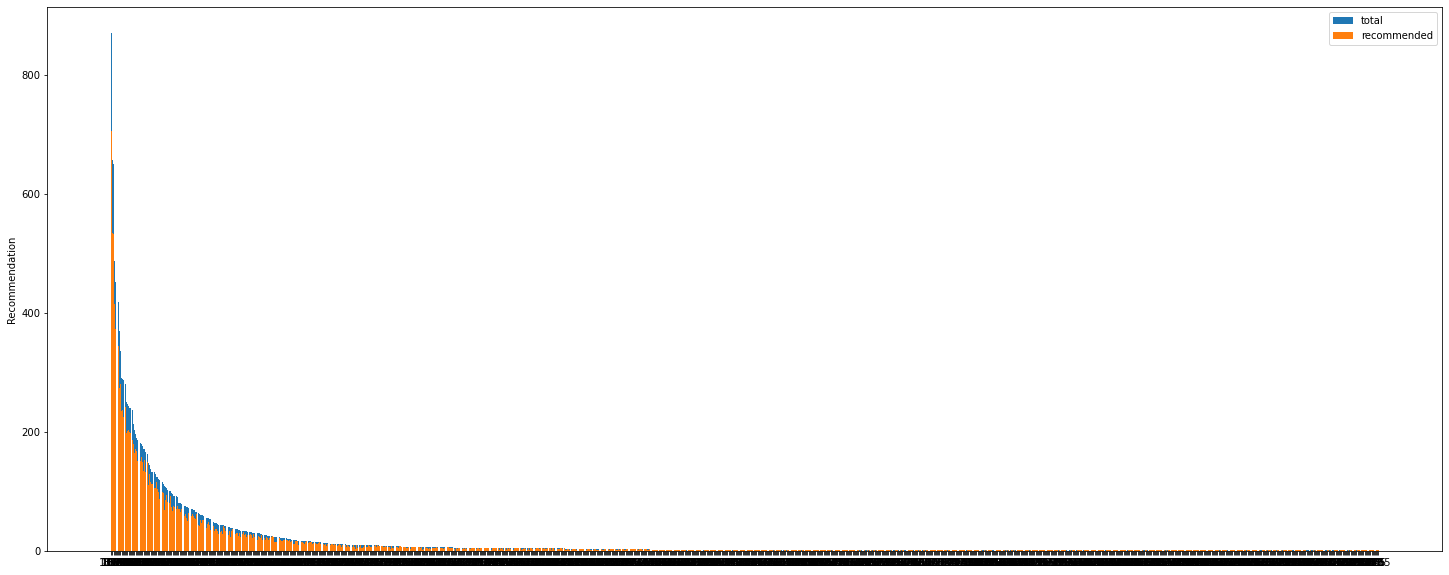

     Clothing ID       Avg  total  Recommended IND
974         1078  0.811711    871              707
764          862  0.811550    658              534
990         1094  0.818740    651              533
977         1081  0.852156    487              415
732          829  0.825221    452              373
**************************************************
      Clothing ID  Avg  total  Recommended IND
682           778  1.0      1                1
680           776  0.0      1                0
679           775  1.0      1                1
356           405  1.0      1                1
1094         1205  1.0      1                1


In [20]:
univariate(data,"Clothing ID","Recommended IND",False)

We can observe that, clothing_id 1078 is recommended 707 times out of 871 reviews.. <br>similarly Clothing_id 862 is recommended 534 times out of 658 reviews

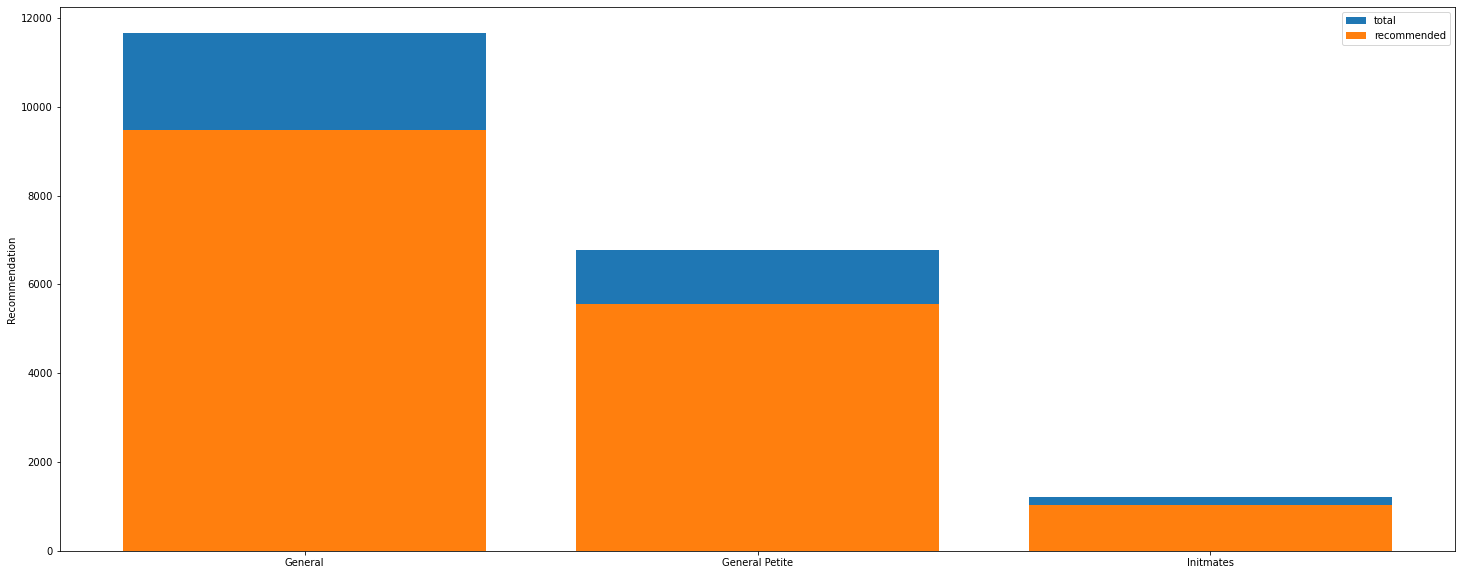

    Division Name       Avg  total  Recommended IND
0         General  0.813615  11664             9490
1  General Petite  0.820744   6778             5563
2       Initmates  0.847541   1220             1034
**************************************************
    Division Name       Avg  total  Recommended IND
0         General  0.813615  11664             9490
1  General Petite  0.820744   6778             5563
2       Initmates  0.847541   1220             1034


In [21]:
univariate(data,"Division Name","Recommended IND",False)

We can observe that General division dresses recommended 9490 times out of 11664 of general dress reviews.

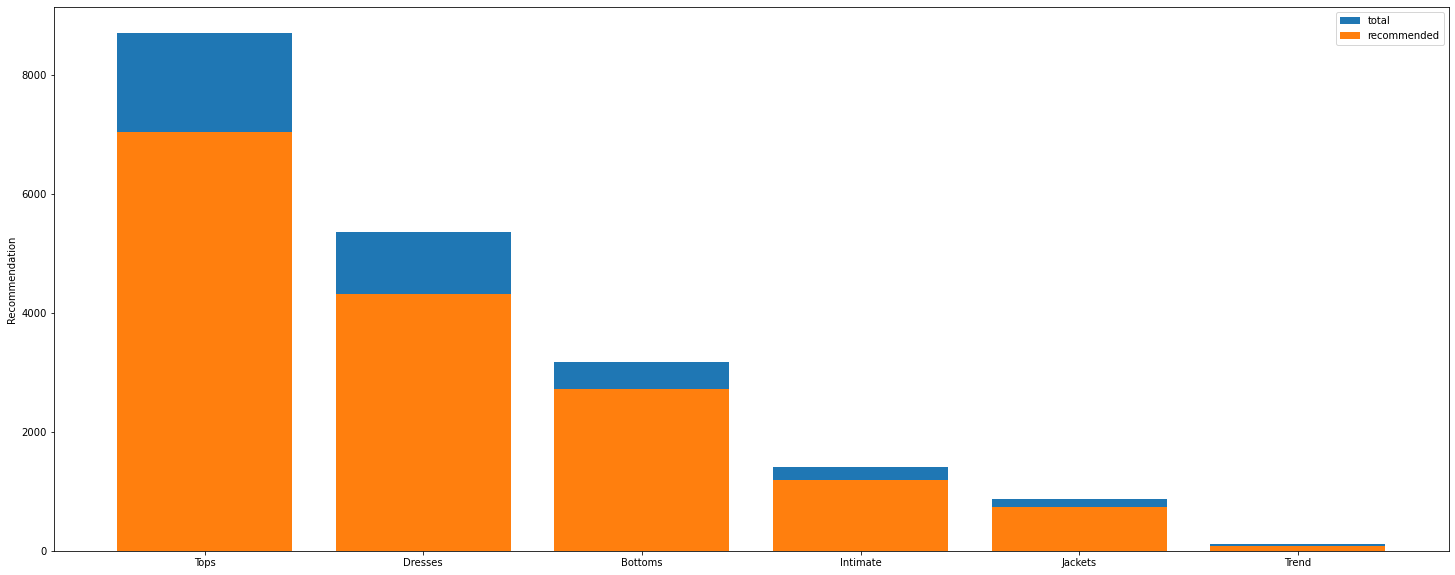

  Department Name       Avg  total  Recommended IND
4            Tops  0.808791   8713             7047
1         Dresses  0.803202   5371             4314
0         Bottoms  0.852701   3184             2715
2        Intimate  0.845881   1408             1191
3         Jackets  0.840728    879              739
**************************************************
  Department Name       Avg  total  Recommended IND
1         Dresses  0.803202   5371             4314
0         Bottoms  0.852701   3184             2715
2        Intimate  0.845881   1408             1191
3         Jackets  0.840728    879              739
5           Trend  0.757009    107               81


In [22]:
univariate(data,"Department Name","Recommended IND",False)

Tops are recommended 7047 times out of 8713 tops reviews

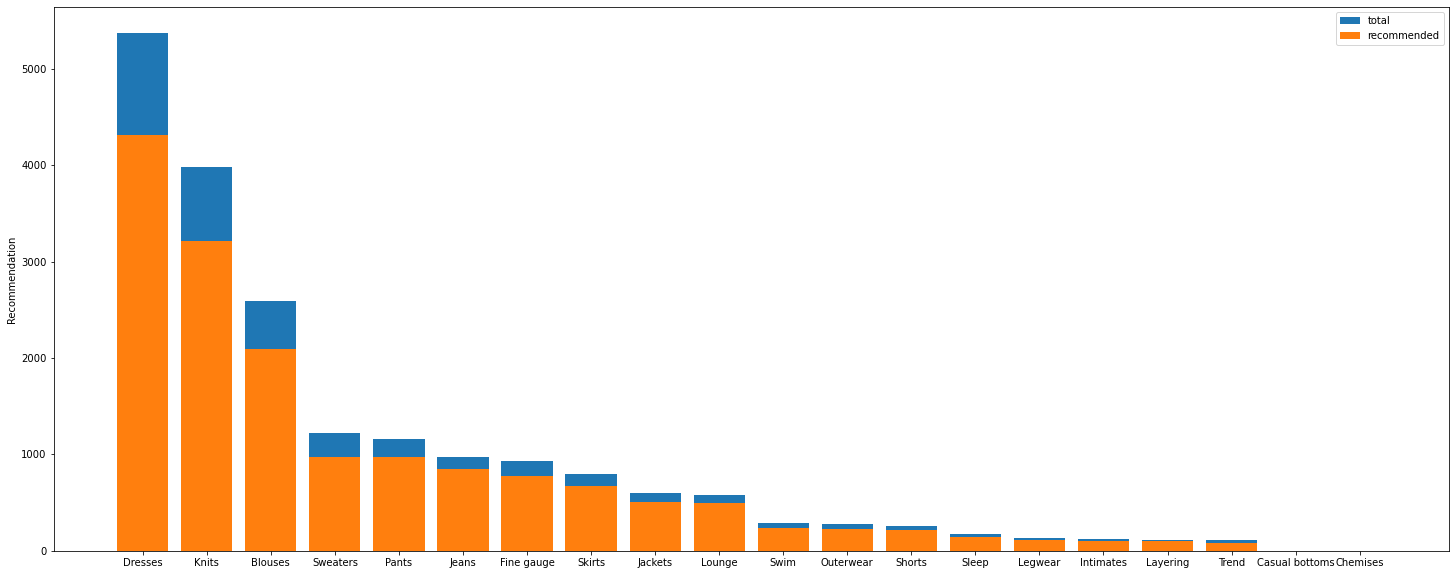

   Class Name       Avg  total  Recommended IND
3     Dresses  0.803202   5371             4314
8       Knits  0.806330   3981             3210
0     Blouses  0.809432   2587             2094
17   Sweaters  0.795567   1218              969
13      Pants  0.840968   1157              973
**************************************************
        Class Name       Avg  total  Recommended IND
5        Intimates  0.866667    120              104
9         Layering  0.886957    115              102
19           Trend  0.757009    107               81
1   Casual bottoms  1.000000      1                1
2         Chemises  1.000000      1                1


In [23]:
univariate(data,"Class Name","Recommended IND",False)

Dresses recommended 4314 times out of 5371 dresses reviews

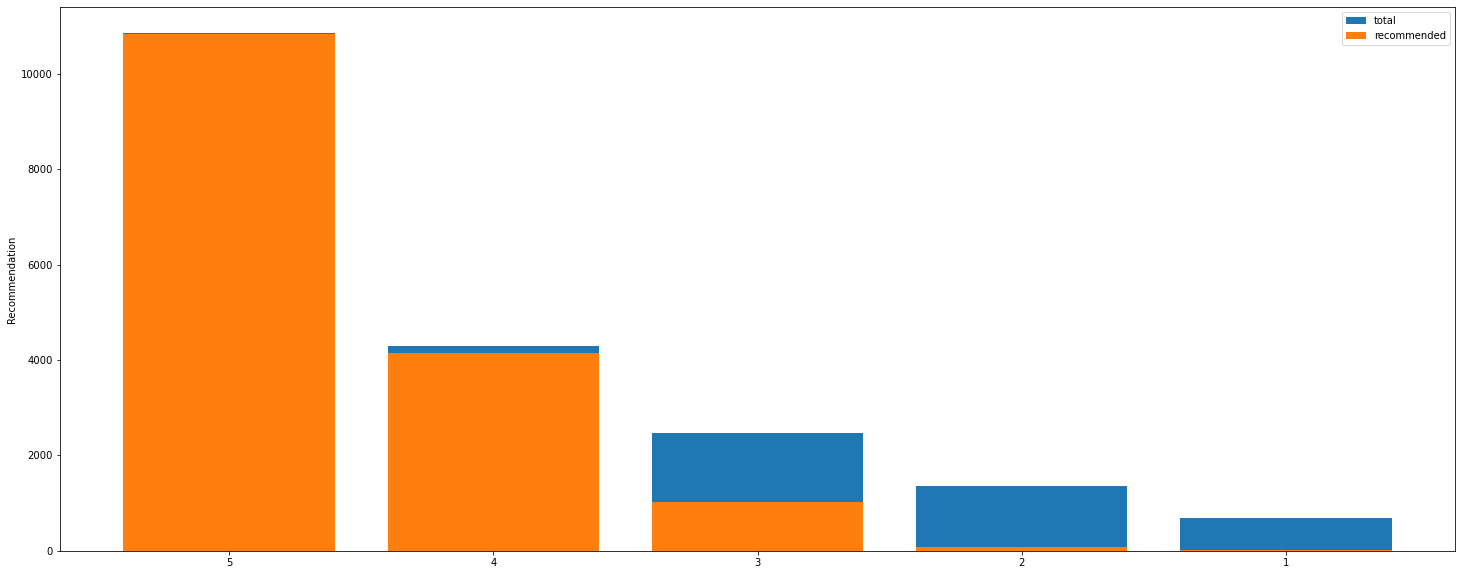

   Rating       Avg  total  Recommended IND
4       5  0.998066  10858            10837
3       4  0.965959   4289             4143
2       3  0.413961   2464             1020
1       2  0.058824   1360               80
0       1  0.010130    691                7
**************************************************
   Rating       Avg  total  Recommended IND
4       5  0.998066  10858            10837
3       4  0.965959   4289             4143
2       3  0.413961   2464             1020
1       2  0.058824   1360               80
0       1  0.010130    691                7


In [24]:
univariate(data,"Rating","Recommended IND",False)

We can observe that the clothings which are rated 5 are highly recommended.. 10837 clothings which rated 5 are recommended out of 10858..<br>
ratings with 1 are not much recommended. only 7 clothings which are rated 1 are recommended out of 691..<br>***So we can say the higher the rating higher is the recommendation....***

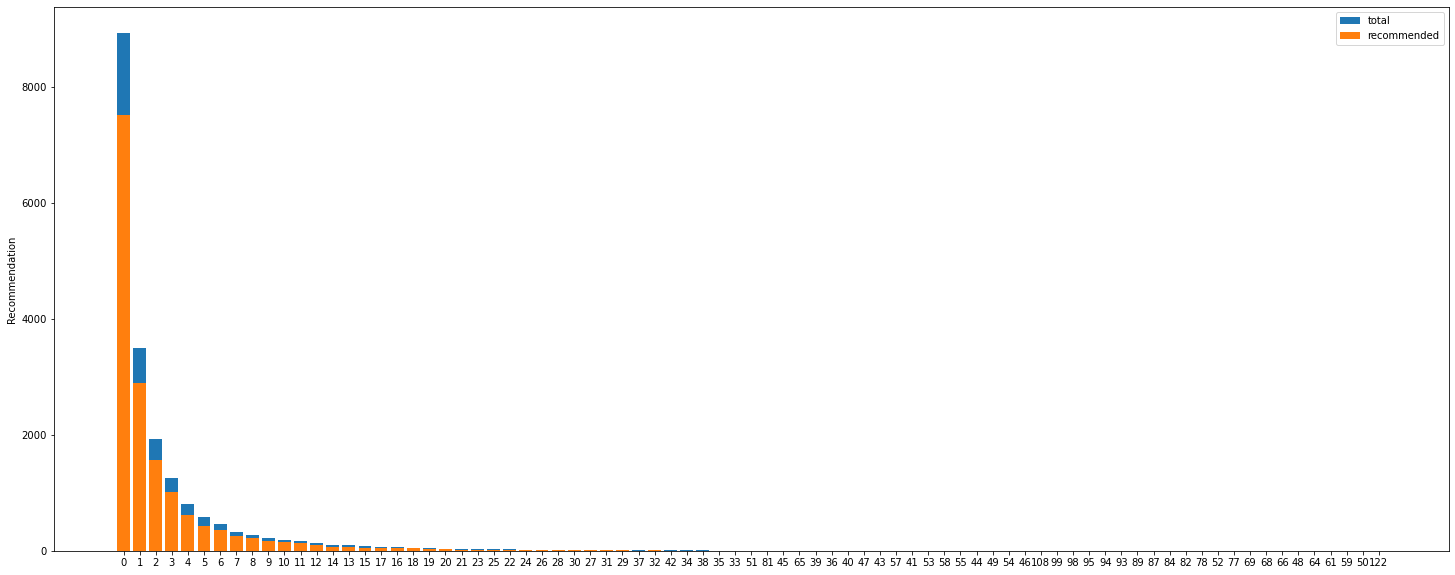

   Positive Feedback Count       Avg  total  Recommended IND
0                        0  0.841545   8930             7515
1                        1  0.826099   3502             2893
2                        2  0.816433   1923             1570
3                        3  0.812401   1258             1022
4                        4  0.774595    803              622
**************************************************
    Positive Feedback Count  Avg  total  Recommended IND
60                       64  1.0      1                1
59                       61  1.0      1                1
58                       59  1.0      1                1
50                       50  1.0      1                1
78                      122  1.0      1                1


In [25]:
univariate(data,"Positive Feedback Count","Recommended IND",False)

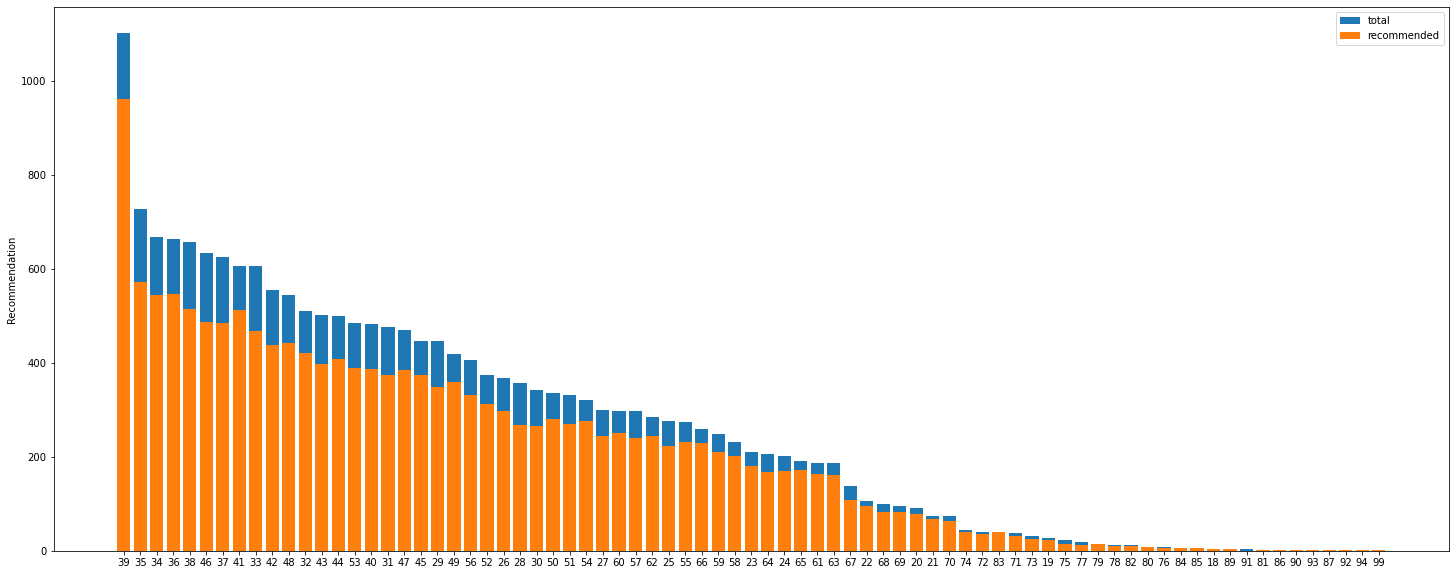

    Age       Avg  total  Recommended IND
21   39  0.872167   1103              962
17   35  0.785714    728              572
16   34  0.816143    669              546
18   36  0.823795    664              547
20   38  0.784195    658              516
**************************************************
    Age  Avg  total  Recommended IND
74   93  1.0      2                2
69   87  1.0      1                1
73   92  1.0      1                1
75   94  1.0      1                1
76   99  1.0      1                1


In [26]:
univariate(data,"Age","Recommended IND",False)

From this we could say that reviewers of age 39 recommended 962 clothings out of 1103. and they are the people who shopped most.

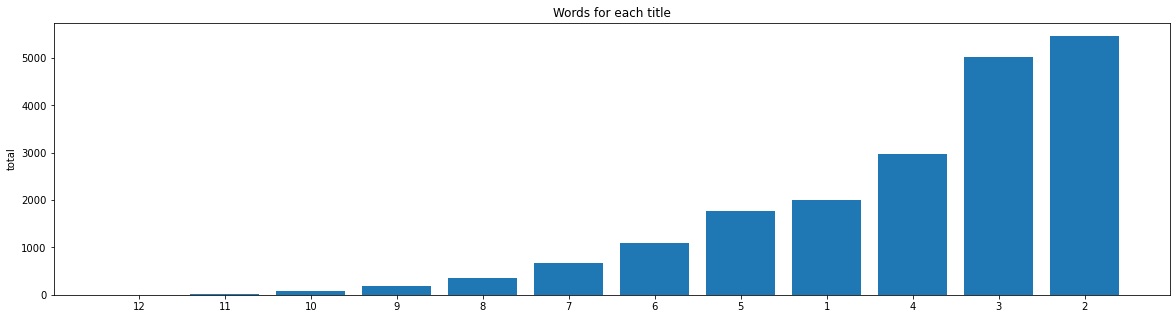

In [27]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = data['Title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('total')
plt.title('Words for each title')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

Most of the title contain only two words.. second highest is 3 words..

# Cleaning the data......

In [28]:
#convert all letters to lower case, replace the space by _ 
data["Class Name"]=data["Class Name"].str.lower()
data["Class Name"]=data["Class Name"].str.replace(" ","_")

#Want to see the va;ue_counts??
data["Class Name"].value_counts()

dresses           5371
knits             3981
blouses           2587
sweaters          1218
pants             1157
jeans              970
fine_gauge         927
skirts             796
jackets            598
lounge             574
swim               293
outerwear          281
shorts             260
sleep              174
legwear            131
intimates          120
layering           115
trend              107
casual_bottoms       1
chemises             1
Name: Class Name, dtype: int64

In [29]:
data["Department Name"]=data["Department Name"].str.lower()
data["Department Name"]=data["Department Name"].str.replace(" ","_")
data["Department Name"].value_counts()

tops        8713
dresses     5371
bottoms     3184
intimate    1408
jackets      879
trend        107
Name: Department Name, dtype: int64

In [30]:
data["Division Name"]=data["Division Name"].str.lower()
data["Division Name"]=data["Division Name"].str.replace(" ","_")
data["Division Name"].value_counts()

general           11664
general_petite     6778
initmates          1220
Name: Division Name, dtype: int64

In [31]:
#let us define a function to replace shorthand notations with full....

In [32]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [33]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [34]:
# Combining all the above......
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [35]:
preprocessed_title=preprocess_text(data["Title"].values)

100%|██████████| 19662/19662 [00:00<00:00, 32261.45it/s]


In [36]:
#lets replace the title column in the dataframe with preprocessed title.
data["Title"]=preprocessed_title

In [37]:
#lets see how the review text looks like before preprocessing..(here we can see the 2nd review)
data["Review Text"][1]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [38]:
preprocessed_review=preprocess_text(data["Review Text"].values)

100%|██████████| 19662/19662 [00:04<00:00, 4904.62it/s]


In [39]:
preprocessed_review[1]

'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments'

In [40]:
#lets replace the review column in the dataframe with preprocessed review.
data["Review Text"]=preprocessed_review

In [41]:
#Lets take out our class label (recommended ind) and keep it in variable y..
# because this is the class label that we have to predict given all other features.
#and all other features are kept in x variable..
y=data["Recommended IND"]
x=data.drop(["Recommended IND"],axis=1)
x.head(1)

,index,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,major design flaws,high hopes dress really wanted work initially ...,3,0,general,dresses,dresses


In [42]:
#NOW, split data into train,cv,test data.......
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.33,stratify=y, random_state =41)
x_train,x_cv,y_train,y_cv=train_test_split(X_train,Y_train,test_size=0.33,stratify=Y_train, random_state =41)

# PRE_PROCESSING.......

# Bag Of Words(BOW)

In [43]:
vec=CountVectorizer()
vec.fit(x_train["Title"].values)
print(x_train.shape,y_train.shape)

x_train_title=vec.transform(x_train["Title"].values)
x_cv_title=vec.transform(x_cv["Title"].values)
x_test_title=vec.transform(x_test["Title"].values)

print("after vectorization....")
print(x_train_title.shape,y_train.shape)
print(x_cv_title.shape,y_cv.shape)
print(x_test_title.shape,y_test.shape)

(8825, 10) (8825,)
after vectorization....
(8825, 2432) (8825,)
(4348, 2432) (4348,)
(6489, 2432) (6489,)


In [44]:
vec=CountVectorizer()
vec.fit(x_train["Review Text"].values)

x_train_rev=vec.transform(x_train["Review Text"].values)
x_cv_rev=vec.transform(x_cv["Review Text"].values)
x_test_rev=vec.transform(x_test["Review Text"].values)

print("after vectorization....")
print(x_train_rev.shape,y_train.shape)
print(x_cv_rev.shape,y_cv.shape)
print(x_test_rev.shape,y_test.shape)

after vectorization....
(8825, 9459) (8825,)
(4348, 9459) (4348,)
(6489, 9459) (6489,)


In [45]:
vec=CountVectorizer()
vec.fit(x_train["Division Name"].values)

x_train_div=vec.transform(x_train["Division Name"].values)
x_cv_div=vec.transform(x_cv["Division Name"].values)
x_test_div=vec.transform(x_test["Division Name"].values)

print("after vectorization....")
print(x_train_div.shape,y_train.shape)
print(x_cv_div.shape,y_cv.shape)
print(x_test_div.shape,y_test.shape)

print(vec.get_feature_names())

after vectorization....
(8825, 3) (8825,)
(4348, 3) (4348,)
(6489, 3) (6489,)
['general', 'general_petite', 'initmates']


In [46]:
vec=CountVectorizer()
vec.fit(x_train["Department Name"].values)

x_train_dep=vec.transform(x_train["Department Name"].values)
x_cv_dep=vec.transform(x_cv["Department Name"].values)
x_test_dep=vec.transform(x_test["Department Name"].values)

print("after vectorization....")
print(x_train_dep.shape,y_train.shape)
print(x_cv_dep.shape,y_cv.shape)
print(x_test_dep.shape,y_test.shape)

print(vec.get_feature_names())

after vectorization....
(8825, 6) (8825,)
(4348, 6) (4348,)
(6489, 6) (6489,)
['bottoms', 'dresses', 'intimate', 'jackets', 'tops', 'trend']


In [47]:
vec=CountVectorizer()
vec.fit(x_train["Class Name"].values)

x_train_cls=vec.transform(x_train["Class Name"].values)
x_cv_cls=vec.transform(x_cv["Class Name"].values)
x_test_cls=vec.transform(x_test["Class Name"].values)

print("after vectorization....")
print(x_train_cls.shape,y_train.shape)
print(x_cv_cls.shape,y_cv.shape)
print(x_test_cls.shape,y_test.shape)

print(vec.get_feature_names())


after vectorization....
(8825, 19) (8825,)
(4348, 19) (4348,)
(6489, 19) (6489,)
['blouses', 'casual_bottoms', 'dresses', 'fine_gauge', 'intimates', 'jackets', 'jeans', 'knits', 'layering', 'legwear', 'lounge', 'outerwear', 'pants', 'shorts', 'skirts', 'sleep', 'sweaters', 'swim', 'trend']


In [48]:
#We keep our rating data which is categorical data in numerical form as it is.

In [49]:
x_train_rate=(np.array(x_train["Rating"])).reshape((-1,1))
x_cv_rate=(np.array(x_cv["Rating"])).reshape(-1,1)
x_test_rate=(np.array(x_test["Rating"])).reshape((-1,1))


print("after vectorization.......")
print(x_train_rate.shape,y_train.shape)
print(x_cv_rate.shape,y_cv.shape)
print(x_test_rate.shape,y_test.shape)


after vectorization.......
(8825, 1) (8825,)
(4348, 1) (4348,)
(6489, 1) (6489,)


In [50]:
#normalize age column.
from sklearn.preprocessing import Normalizer
norm=Normalizer()

norm.fit(x_train["Age"].values.reshape(1,-1))

x_train_age=norm.transform(x_train["Age"].values.reshape(1,-1))
x_cv_age=norm.transform(x_cv["Age"].values.reshape(1,-1))
x_test_age=norm.transform(x_test["Age"].values.reshape(1,-1))

x_train_age=x_train_age.reshape(-1,1)
x_cv_age=x_cv_age.reshape(-1,1)
x_test_age=x_test_age.reshape(-1,1)


print("after vectorization.......")
print(x_train_age.shape,y_train.shape)
print(x_cv_age.shape,y_cv.shape)
print(x_test_age.shape,y_test.shape)


after vectorization.......
(8825, 1) (8825,)
(4348, 1) (4348,)
(6489, 1) (6489,)


In [51]:
#Combining all the preprocessed data

In [52]:
from scipy.sparse import hstack

x_tr=hstack((x_train_rev,x_train_title,x_train_div,x_train_dep,x_train_cls,x_train_rate,x_train_age)).tocsr()
x_cv=hstack((x_cv_rev,x_cv_title,x_cv_div,x_cv_dep,x_cv_cls,x_cv_rate,x_cv_age)).tocsr()
x_te=hstack((x_test_rev,x_test_title,x_test_div,x_test_dep,x_test_cls,x_test_rate,x_test_age)).tocsr()

print("FINAL DATA MATRIX SHAPE IS ........")
print(x_tr.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)
print(x_te.shape,y_test.shape)
print("*"*100)

FINAL DATA MATRIX SHAPE IS ........
(8825, 11921) (8825,)
(4348, 11921) (4348,)
(6489, 11921) (6489,)
****************************************************************************************************


In [53]:
#This function takes classifier and data , and then gives probability_score of class label

In [54]:
def batch_predict(clf, data):
    """This function takes classifier and data , and then gives probability_score of class label"""
    y_data_pred = []                                                 #list to store probability of class
    tr_loop = data.shape[0] - data.shape[0]%1000                     #to loop through batchwise and took 1000 for batch
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])     # this loop for upto last 1000 multiplier
    
    if data.shape[0]%1000 !=0:                                        #predicting for last data
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 9/9 [00:00<00:00, 32.92it/s]


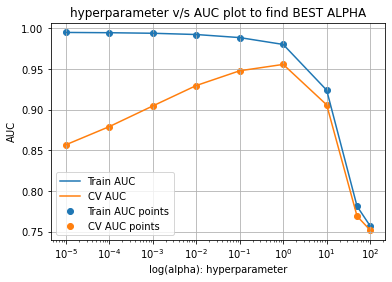

In [55]:
import math
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

train_auc = []    
cv_auc = []
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,50,100]         #to find the best alpha value
for i in tqdm(alpha):
    neigh = MultinomialNB(alpha=i,class_prior=[0.5,0.5],fit_prior=False)
    neigh.fit(x_tr, y_train)

    y_train_pred = batch_predict(neigh, x_tr)               #finding probability scores of x_tr using batch_predict function
    y_cv_pred = batch_predict(neigh, x_cv)                  ##finding probability scores of x_cv using batch_predict function

          
    train_auc.append(roc_auc_score(y_train,y_train_pred))   #appending auc values
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))


    
plt.plot(alpha, train_auc, label='Train AUC')        #plotting hyper_parameter v/s auc value plot....
plt.plot(alpha, cv_auc, label='CV AUC')
plt.xscale("log")
plt.scatter(alpha , train_auc, label='Train AUC points')
plt.scatter(alpha , cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("hyperparameter v/s AUC plot to find BEST ALPHA")
plt.grid()
plt.show()

In [56]:
#best alpha = 10^0 = 1
best_alpha_bow=1

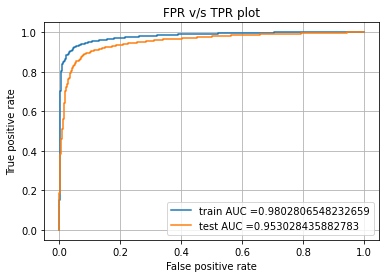

In [57]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clas = MultinomialNB(alpha=best_alpha_bow,class_prior=[0.5,0.5],fit_prior=False)
clas.fit(x_tr, y_train)


y_train_pred = batch_predict(clas, x_tr)    
y_test_pred = batch_predict(clas, x_te)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(test_auc))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("FPR v/s TPR plot")
plt.grid()
plt.show()

In [58]:
def find_best_threshold(threshold, fpr, tpr):
    """it will give best threshold value that will give the least fpr"""
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    
    return t

def predict_with_best_t(proba, threshold):
    """this will give predictions based on best threshold value"""
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [59]:
#computing confusion matrix for set_1
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
m_tr=(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print(m_tr)
print("Test confusion matrix")
m_te=(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print(m_te)
#you are concerned that this cell produced fifferent result?
#yes sir
#no. if i run this code from the begining then it will be different result

the maximum value of tpr*(1-fpr) 0.878776953199331 for threshold 0.817
Train confusion matrix
[[1526   78]
 [ 551 6670]]
Test confusion matrix
[[1026  154]
 [ 462 4847]]


From the confusion matrix , we can observe that, TPR, TNR are high. FPR,FNR are significantly lower.<br>***So We got a good result***

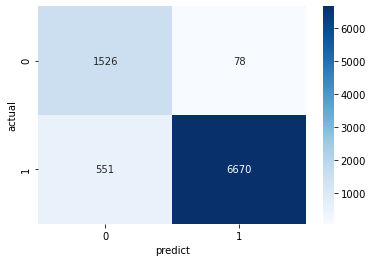

In [60]:
cm_tr = np.array(m_tr)
cm_te=np.array(m_te)
#plotting heatmap
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='Blues')
plt.xlabel("predict")
plt.ylabel("actual")
plt.show()

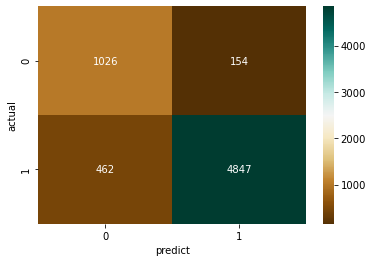

In [61]:
sns.heatmap(cm_te,annot=True,fmt="d",cmap="BrBG")
plt.xlabel("predict")
plt.ylabel("actual")
plt.show()

We can see the result of confusion matrix through ***HEAT MAP*** also.

In [62]:
#Lets calculate precision,recall, and f1 score

precision= m_te[1][1]/(m_te[1][0]+m_te[1][1])
print(precision)

recall=m_te[1][1]/(m_te[0][1]+m_te[1][1])
print(recall)

f1=(2*precision*recall)/(precision+recall)
print(f1)

0.9129779619514032
0.9692061587682463
0.9402521823472357


In [63]:
index=[1]
summary_df=pd.DataFrame({"Vectorizer":("BOW"),"Hyper-parameter(alpha)":(best_alpha_bow),"Train_AUC":(train_auc),"Test_AUC":(test_auc), "Precision":(precision),"Recall":(recall),"F_1_Score":(f1)},index=index)
summary_df

,Vectorizer,Hyper-parameter(alpha),Train_AUC,Test_AUC,Precision,Recall,F_1_Score
1,BOW,1,0.980281,0.953028,0.912978,0.969206,0.940252


1]. When we use BOW vectorizer , we got 0.95 as test AUC.<br>     This means there is 95% chance that our model will be able to classify positive and negative points i.e. ***recommended*** or ***not recommended***<br>2]. We got TPR and TNR high, and FPR,FNR lower, this shows our model predicts pretty well.<br>